<a href="https://colab.research.google.com/github/lilymm88/open/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
import json

# Define API URL
api_url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&appid=37524d59f4927efef9b0e0059cd6d4ef"

# Send request
response = requests.get(api_url)

# Check response
if response.status_code == 200:

  data = response.json()
  print(json.dumps(data, indent=4)) # Use json.dumps for pretty printing
else:
  print("Error:", response.status_code)

{
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {
            "dt": 1743973200,
            "main": {
                "temp": 271.51,
                "feels_like": 265.25,
                "temp_min": 271.51,
                "temp_max": 271.6,
                "pressure": 1007,
                "sea_level": 1007,
                "grnd_level": 988,
                "humidity": 73,
                "temp_kf": -0.09
            },
            "weather": [
                {
                    "id": 601,
                    "main": "Snow",
                    "description": "snow",
                    "icon": "13n"
                }
            ],
            "clouds": {
                "all": 100
            },
            "wind": {
                "speed": 6.73,
                "deg": 46,
                "gust": 13.85
            },
            "visibility": 163,
            "pop": 1,
            "snow": {
                "3h": 4.56
            },
            "sys":

In [6]:
import requests
import json
import pandas as pd

# Define API URL
api_url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&appid=37524d59f4927efef9b0e0059cd6d4ef"

# Send request
response = requests.get(api_url)

# Check response
if response.status_code == 200:
  data = response.json()
 # Extract the 'list' which contains the main data
  data_list = data['list']

 # Normalize the main data
  df = pd.json_normalize(data_list)

 # Handle the 'weather' field, 处理 'weather' 字段，如果该字段有值则取第一个元素，否则为空字典
  df['weather'] = df['weather'].apply(lambda x: x[0] if x else {})

 # Normalize the 'weather' field and concatenate it with the main DataFrame
  weather_df = pd.json_normalize(df['weather'])
  print("weather_df:", weather_df)
  # 从主DataFrame中删除 'weather' 字段，并与规范化后的 'weather' DataFrame 合并
  df = pd.concat([df.drop(columns=['weather']), weather_df], axis=1)

 # Display the DataFrame
  print(df)
else:
  print("Error:", response.status_code)

            dt                                            weather  visibility  \
0   1743973200  [{'id': 601, 'main': 'Snow', 'description': 's...       163.0   
1   1743984000  [{'id': 601, 'main': 'Snow', 'description': 's...       156.0   
2   1743994800  [{'id': 601, 'main': 'Snow', 'description': 's...       145.0   
3   1744005600  [{'id': 601, 'main': 'Snow', 'description': 's...       173.0   
4   1744016400  [{'id': 600, 'main': 'Snow', 'description': 'l...      2727.0   
5   1744027200  [{'id': 600, 'main': 'Snow', 'description': 'l...      2906.0   
6   1744038000  [{'id': 600, 'main': 'Snow', 'description': 'l...         NaN   
7   1744048800  [{'id': 601, 'main': 'Snow', 'description': 's...        56.0   
8   1744059600  [{'id': 600, 'main': 'Snow', 'description': 'l...     10000.0   
9   1744070400  [{'id': 804, 'main': 'Clouds', 'description': ...     10000.0   
10  1744081200  [{'id': 804, 'main': 'Clouds', 'description': ...      9631.0   
11  1744092000  [{'id': 804,

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


单词: International, 词频: 5
单词: certification, 词频: 5
单词: Postgraduate, 词频: 3
单词: universities, 词频: 3
单词: professional, 词频: 3
单词: certifications, 词频: 3
单词: Fundamentals, 词频: 3
单词: participating, 词频: 2
单词: Accessibility, 词频: 2
单词: Undergraduate, 词频: 1
单词: Post-registration, 词频: 1
单词: Accommodation, 词频: 1
单词: Employability, 词频: 1
单词: scholarships, 词频: 1
单词: apprenticeships, 词频: 1
单词: Sustainability, 词频: 1
单词: Partnerships, 词频: 1
单词: participation, 词频: 1
单词: participated, 词频: 1
单词: technologies, 词频: 1
单词: multinational, 词频: 1
单词: employability, 词频: 1
单词: supplementing, 词频: 1
单词: qualifications, 词频: 1
单词: Intelligence, 词频: 1
单词: institutions, 词频: 1
单词: capabilities, 词频: 1
单词: demonstrated, 词频: 1
单词: Professional, 词频: 1
单词: Certifications, 词频: 1
单词: top-performing, 词频: 1
单词: state-of-the-art, 词频: 1
单词: behind-the-scenes, 词频: 1
单词: intelligence, 词频: 1
单词: helicopters., 词频: 1
单词: undergraduate, 词频: 1
单词: successfully, 词频: 1
单词: life-changing, 词频: 1


<Axes: xlabel='Samples', ylabel='Counts'>

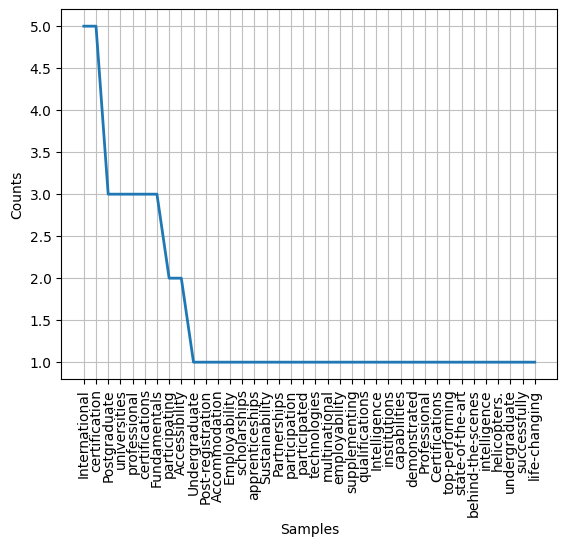

In [11]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize.punkt import FreqDist
from nltk import word_tokenize
from urllib import request
from bs4 import BeautifulSoup

url = "https://www.dmu.ac.uk/about-dmu/news/2022/february/microsoft-crowns-dmu-students-as-winners-in-2022-uk-university-cloud-challenge.aspx"

# Opens the URL, reads the HTML content, and decodes it to UTF-8.
html = request.urlopen(url).read().decode('utf8')

# Parses the HTML using BeautifulSoup and extracts the plain text.
raw = BeautifulSoup(html, 'html.parser').get_text()

# Tokenizes the text into individual words.
tokens = word_tokenize(raw)

# Creates an NLTK Text object from the tokens.
text = nltk.Text(tokens)

# Creates a frequency distribution of words longer than 11 characters.# 统计长度大于 11 的单词的词频
fd = FreqDist([w for w in text if len(w)>11])
# 遍历所有单词及其词频
for word, freq in fd.most_common():
    print(f"单词: {word}, 词频: {freq}")
# Plots the frequency distribution.
fd.plot()